In [42]:
%pylab qt5
%matplotlib inline
import scipy.stats
import scipy.constants as const

Populating the interactive namespace from numpy and matplotlib


In [44]:
pylab.rcParams['figure.figsize'] = (10, 6)

In [7]:
import os

In [8]:
V = dict()
pab = dict()
pauf = dict()
csvs = [name for name in os.listdir() if name.endswith('.csv')]
for name in csvs:
    daten = loadtxt(name, delimiter=',', skiprows=1)
    print(name[:-8])
    T = float(name[:-8])
    V[T] = daten[:, 0]
    pab[T] = daten[:, 1]
    pauf[T] = daten[:, 2]

25
40
35
30
55
47.5
45
42.5
50


### Gruppe 2 (wir)

In [9]:
grp2 = {30:'x', 42.5:'+', 50:'o'}
args = []
for x in grp2:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp2[x])
plt.plot(*args)

### Gruppe 1

In [10]:
# 25, 40, 47.5
# grad25 = loadtxt('./25grad.csv', delimiter=',', skiprows=1)
# V25, pab25, pauf25 = grad25[:, 0], grad25[:, 1], grad25[:, 2]
# grad425 = loadtxt('./42.5grad.csv', delimiter=',', skiprows=1)
# V425, pab425, pauf425 = grad425[:, 0], grad425[:, 1], grad425[:, 2]
# grad50 = loadtxt('./50grad.csv', delimiter=',', skiprows=1)
# V50, pab50, pauf50 = grad50[:, 0], grad50[:, 1], grad50[:, 2]

In [11]:
grp1 = {25:'x', 40:'+', 47.5:'o'}
args = []
for x in grp1:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp1[x])
plt.plot(*args)

### Gruppe 3

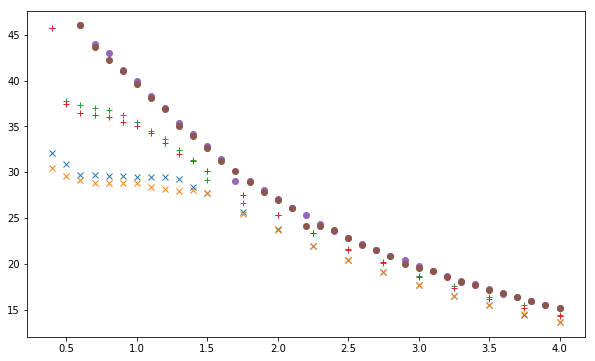

In [103]:
grp3 = {35:'x', 45:'+', 55:'o'}
args = []
for x in grp3:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp3[x])
plt.plot(*args)

In [78]:
alle = dict(grp1); alle.update(grp2); alle.update(grp3)

In [88]:
# mitteln pab und pauf zu p
p = {}
for T in alle:
    p[T] = .5 * (pab[T] + pauf[T])
    p[T][where(isnan(p[T]))] = pab[T][where(isnan(p[T]))]

47.5 Grad: (Gruppe 1)
n R T = 7.5175839003391465 Joule
n1 = 0.0028197655586642252

50 Grad: (Gruppe 2)
n R T = 7.563094295876462 Joule
n2 = 0.002814889279564141

55 Grad: (Gruppe 3)
n R T = 6.854644628506384 Joule
n3 = 0.002512340490284236



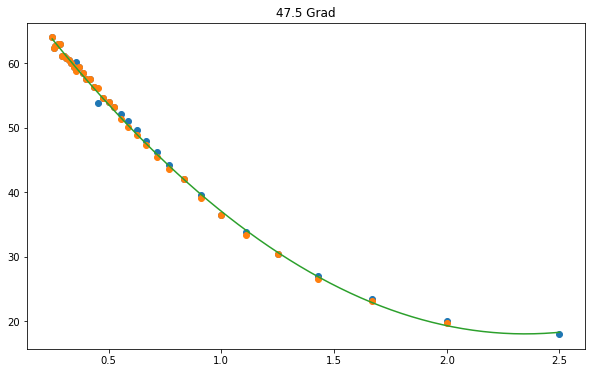

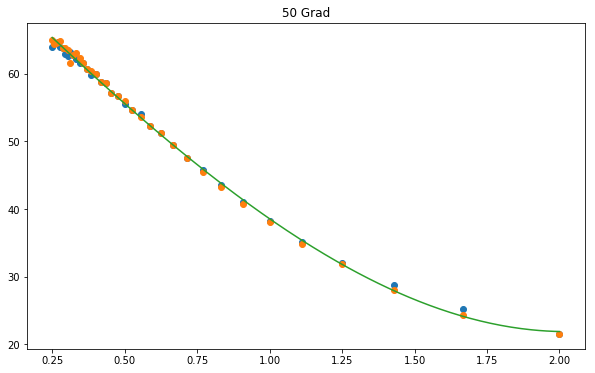

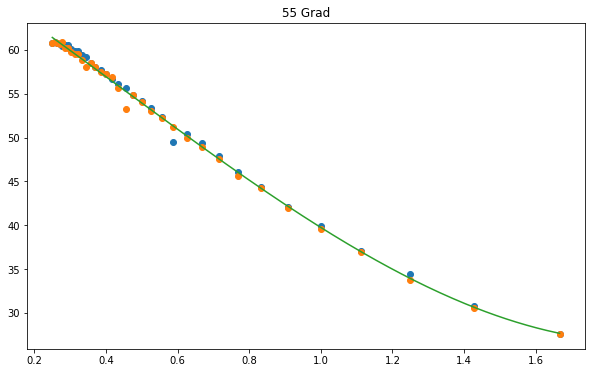

In [89]:
uberkrit = {47.5:1, 50:2, 55:3}
for T in uberkrit:
    _ = plt.figure()
    Vol = V[T]
    _ = plt.plot(1/Vol, transpose([pab[T]*Vol, pauf[T]*Vol]), 'o')
    a, b, c, d = scipy.polyfit(1/Vol, p[T]*V[T], deg=3)
    n = d * .1 / const.R / (T + const.zero_Celsius)
    print(f'{T} Grad: (Gruppe {uberkrit[T]})')
    print(f'n R T = {d * .1} Joule')
    print(f'n{uberkrit[T]} = {n}')
    print()
    exec(f'n{uberkrit[T]} = {n}')
    x = linspace(min(1/Vol), max(1/Vol), 200)
    _ = plt.plot(x, a*x**3 + b*x**2 + c*x + d)
    _ = plt.title(f'{T} Grad')

In [64]:
const.zero_Celsius

273.15

## Aufgabe 4

In [75]:
grp = {1:grp1, 2:grp2, 3:grp3}
n = {1:n1, 2:n2, 3:n3}
V_m = {}
for i in range(1, 3+1):
    for T in grp[i]:
        V_m[T] = V[T] / n[i]

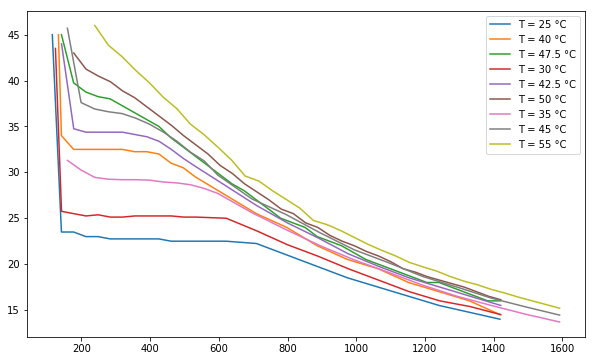

In [104]:
args = []
leg = []
for T in alle:
    args.append(V_m[T])
    args.append(p[T])
    # args.append('.')
    leg.append(f'T = {T} °C')
ax = plt.plot(*args)
plt.legend(ax, leg)

In [141]:
for T in alle:
    A = transpose([V_m[T], p[T]])
    savetxt(f'molar{T}.csv', A, delimiter=',', header='V_m,p', comments='')